# Task 1
5390<br>
Elaina Rohlfing


Ran into issues with initial dataset choice (political_memes, training was stuck at baseline). So I used bears dataset instead, but unfortunately I ran short on time. Notebook may be incomplete.

## Load the data
* Upload & unzip the dataset
* Load training and validation images
* Combine images into single folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/MyDrive/Colab Notebooks/bears_ws.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/bears_ws.zip
   creating: bears/
  inflating: bears/.DS_Store         
  inflating: __MACOSX/bears/._.DS_Store  
   creating: bears/test/
   creating: bears/training/
   creating: bears/validation/
   creating: bears/test/polar/
  inflating: bears/test/.DS_Store    
  inflating: __MACOSX/bears/test/._.DS_Store  
   creating: bears/test/panda/
   creating: bears/test/grizzly/
   creating: bears/training/polar/
  inflating: bears/training/.DS_Store  
  inflating: __MACOSX/bears/training/._.DS_Store  
   creating: bears/training/panda/
   creating: bears/training/grizzly/
   creating: bears/validation/polar/
  inflating: bears/validation/.DS_Store  
  inflating: __MACOSX/bears/validation/._.DS_Store  
   creating: bears/validation/panda/
   creating: bears/validation/grizzly/
  inflating: bears/test/polar/polar_1198.jpg  
  inflating: bears/test/polar/polar_1167.jpg  
  inflating: bears/test/polar/polar_1359.jpg  
  inflating: bears/test/po

In [ ]:
mv "/content/drive/MyDrive/Colab Notebooks/bears" "/content/bears"

mv: cannot stat '/content/drive/MyDrive/Colab Notebooks/bears': No such file or directory


In [ ]:
! ls -l

total 16
drwxr-xr-x 5 root root 4096 Dec 15  2022 bears
drwx------ 6 root root 4096 Apr 23 18:00 drive
drwxr-xr-x 3 root root 4096 Apr 23 18:00 __MACOSX
drwxr-xr-x 1 root root 4096 Apr 22 13:25 sample_data


In [ ]:
! ls -l "/content/bears"

total 12
drwxr-xr-x 5 root root 4096 Dec 15  2022 test
drwxr-xr-x 5 root root 4096 Dec 15  2022 training
drwxr-xr-x 5 root root 4096 Dec 15  2022 validation


## Prepare the images (training and validation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
image_size = (64, 64)
batch = 32
# Generator for training dataset
train = my_generator.flow_from_directory( "/content/bears/training", target_size=image_size, shuffle=True, batch_size=batch)

# Generator for validation dataset
val = my_generator.flow_from_directory( "/content/bears/validation", target_size=image_size, shuffle=True, batch_size=batch)

# We may need to create another generator for the test dataset
#test = my_generator.flow_from_directory( "/content/Political Meme Dataset/test", target_size=image_size, batch_size=4, class_mode='categorical')


Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [ ]:
print(f'{train.class_indices=}')
print(f'{train.num_classes=}')
print(f'{train.batch_size=}')
print(f'{train.samples=}')
print(f'{train.image_shape=}')

train.class_indices={'grizzly': 0, 'panda': 1, 'polar': 2}
train.num_classes=3
train.batch_size=32
train.samples=718
train.image_shape=(64, 64, 3)


Display one image and its label

In [ ]:
import numpy as np
print(f'{train.class_indices=}')
images, labels = train[0]
idx = np.argmax(labels[0])
classes = list(train.class_indices.keys())
print(f'{classes[idx]=}')

train.class_indices={'grizzly': 0, 'panda': 1, 'polar': 2}
classes[idx]='polar'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Take one batch full of images
def display_image(dataset, index=0, batch=0):
    images, labels = dataset[batch]
    print(images.shape)
    idx = np.argmax(labels[0]) # get label index
    classes = list(train.class_indices.keys())
    plt.imshow(images[index])
    plt.title(f"{str(labels[index])} {classes[idx]}") # add name of label train_ds.class_indices
    plt.axis("off")

(32, 64, 64, 3)


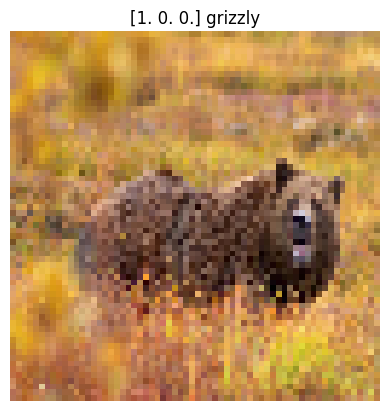

In [ ]:
display_image(train, 1, 2)

(32, 64, 64, 3)


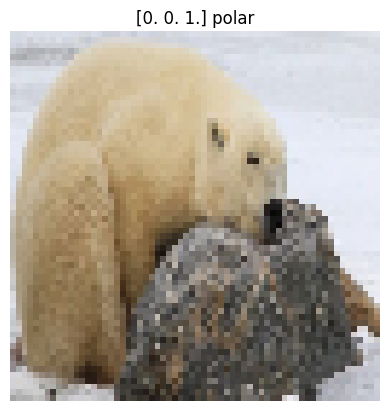

In [ ]:
display_image(val, 2, 2)


# 1. Build the smallest possible model ("model")
Smallest is defined as least parameters needed to achieve our goal of overfitting. Be careful, parameters should be concentrated in convolutional layers, not the dense layers.

In [ ]:
from tensorflow.keras import datasets, layers, models
num_filters = [16, 8, 4]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4, 4)


# convolutional base
model = models.Sequential()
model.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))

# add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

train.image_shape=(64, 64, 3)


## Inspect the model
25083

2243

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 64, 64, 16)        448       
                                                                 
 first_layer_pool (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 4)           292       
                                                                 
 flatten_2 (Flatten)         (None, 64)               

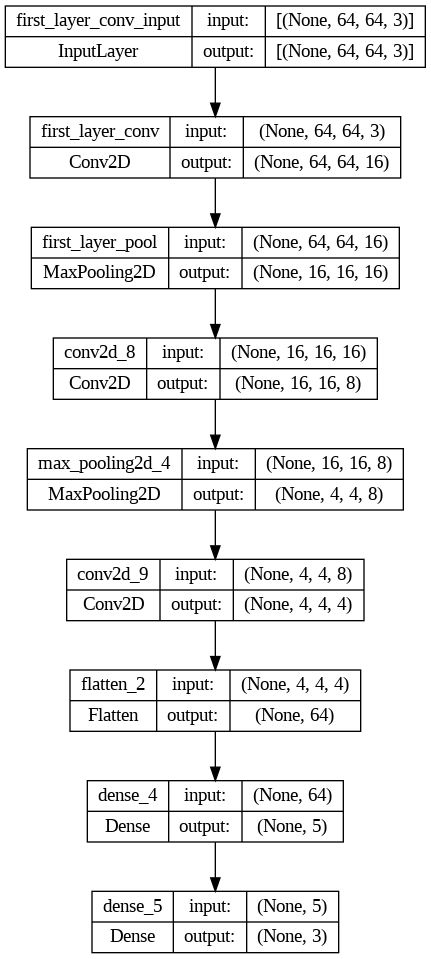

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

## Compile the model to check for errors & Train

In [ ]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.overfit.model2.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', mode='max', save_best_only=True)

#early_stop_callback = EarlyStopping(monitor="val_loss", patience=15, verbose=1)


In [ ]:
history = model.fit(train, epochs=200, callbacks=[checkpoint_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 3s 121ms/step - loss: 0.4401 - accuracy: 0.8830
Epoch 2/200
23/23 [==============================] - 2s 103ms/step - loss: 0.4227 - accuracy: 0.9025
Epoch 3/200
23/23 [==============================] - 2s 74ms/step - loss: 0.4155 - accuracy: 0.8983
Epoch 4/200
23/23 [==============================] - 2s 79ms/step - loss: 0.4116 - accuracy: 0.8900
Epoch 5/200
23/23 [==============================] - 3s 122ms/step - loss: 0.3978 - accuracy: 0.9123
Epoch 6/200
23/23 [==============================] - 3s 126ms/step - loss: 0.3814 - accuracy: 0.9178
Epoch 7/200
23/23 [==============================] - 2s 77ms/step - loss: 0.3756 - accuracy: 0.9150
Epoch 8/200
23/23 [==============================] - 2s 74ms/step - loss: 0.3697 - accuracy: 0.9109
Epoch 9/200
23/23 [==============================] - 2s 76ms/step - loss: 0.3633 - accuracy: 0.9150
Epoch 10/200
23/23 [==============================] - 2s 75ms/step - loss: 0.3502 - accuracy: 0.

Train for a few more epochs

In [ ]:
history = model.fit(train, epochs=50, callbacks=[checkpoint_callback], verbose=1)

Epoch 1/50
23/23 [==============================] - 2s 77ms/step - loss: 0.0435 - accuracy: 0.9916
Epoch 2/50
23/23 [==============================] - 2s 79ms/step - loss: 0.0427 - accuracy: 0.9916
Epoch 3/50
23/23 [==============================] - 2s 79ms/step - loss: 0.0564 - accuracy: 0.9875
Epoch 4/50
23/23 [==============================] - 2s 76ms/step - loss: 0.0447 - accuracy: 0.9916
Epoch 5/50
23/23 [==============================] - 2s 76ms/step - loss: 0.0409 - accuracy: 0.9903
Epoch 6/50
23/23 [==============================] - 2s 76ms/step - loss: 0.0414 - accuracy: 0.9916
Epoch 7/50
23/23 [==============================] - 2s 77ms/step - loss: 0.0454 - accuracy: 0.9903
Epoch 8/50
23/23 [==============================] - 2s 76ms/step - loss: 0.0423 - accuracy: 0.9903
Epoch 9/50
23/23 [==============================] - 2s 75ms/step - loss: 0.0478 - accuracy: 0.9903
Epoch 10/50
23/23 [==============================] - 2s 73ms/step - loss: 0.0450 - accuracy: 0.9889
Epoch 11/

# 2. Model with best fit ("model2")

In [ ]:
from tensorflow.keras import datasets, layers, models
num_filters = [32, 12, 4]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4, 4)


# convolutional base
model2 = models.Sequential()
model2.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model2.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model2.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model2.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model2.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))

# add dense layers on top
model2.add(layers.Flatten())
model2.add(layers.Dense(5, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

train.image_shape=(64, 64, 3)


## Inspect the model
5003

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 64, 64, 32)        896       
                                                                 
 first_layer_pool (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 12)        3468      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 4)           436       
                                                                 
 flatten_1 (Flatten)         (None, 64)               

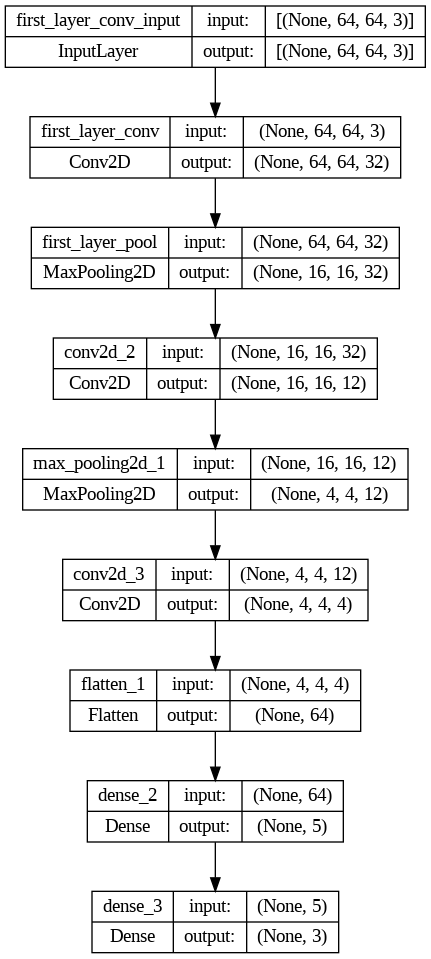

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, show_layer_names=True, show_shapes=True)

## Compile and Train the model

In [ ]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-2.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=15, verbose=1)


In [ ]:
history2 = model2.fit(train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 7s 151ms/step - loss: 1.0897 - accuracy: 0.3802 - val_loss: 1.0587 - val_accuracy: 0.3917
Epoch 2/200
23/23 [==============================] - 2s 98ms/step - loss: 1.0405 - accuracy: 0.4972 - val_loss: 0.9960 - val_accuracy: 0.4417
Epoch 3/200
23/23 [==============================] - 2s 99ms/step - loss: 0.9673 - accuracy: 0.5682 - val_loss: 0.9183 - val_accuracy: 0.5333
Epoch 4/200
23/23 [==============================] - 2s 95ms/step - loss: 0.8947 - accuracy: 0.6156 - val_loss: 0.8381 - val_accuracy: 0.6542
Epoch 5/200
23/23 [==============================] - 2s 95ms/step - loss: 0.8340 - accuracy: 0.6281 - val_loss: 0.7888 - val_accuracy: 0.6917
Epoch 6/200
23/23 [==============================] - 2s 96ms/step - loss: 0.7687 - accuracy: 0.6713 - val_loss: 0.8282 - val_accuracy: 0.5708
Epoch 7/200
23/23 [==============================] - 2s 98ms/step - loss: 0.7346 - accuracy: 0.6643 - val_loss: 0.7177 - val_accuracy: 0.6875
Epoch

# 3. Model with best fit: More filters to smooth the curve ("model3")

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 32, 12]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4, 4)


# convolutional base
model3 = models.Sequential()
model3.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model3.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model3.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model3.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

#model3.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model3.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model3.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))

# add dense layers on top
model3.add(layers.Flatten())
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(3, activation='softmax'))

train.image_shape=(64, 64, 3)


## Inspect the model
5003

In [ ]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 64, 64, 64)        1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 12)          3468      
                                                                 
 flatten_7 (Flatten)         (None, 192)              

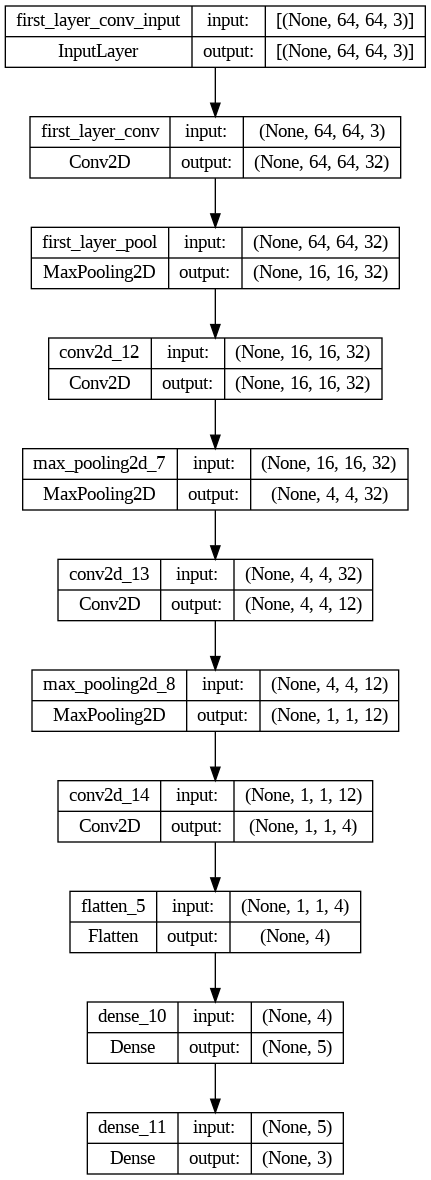

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model3, show_layer_names=True, show_shapes=True)

## Compile and Train the model

In [ ]:
# update model number
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-3.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=15, verbose=1)


In [ ]:
history3 = model3.fit(train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 5s 142ms/step - loss: 1.0551 - accuracy: 0.4192 - val_loss: 1.0620 - val_accuracy: 0.4000
Epoch 2/200
23/23 [==============================] - 2s 103ms/step - loss: 0.8686 - accuracy: 0.5877 - val_loss: 0.7489 - val_accuracy: 0.7708
Epoch 3/200
23/23 [==============================] - 2s 103ms/step - loss: 0.6887 - accuracy: 0.7187 - val_loss: 0.6777 - val_accuracy: 0.7458
Epoch 4/200
23/23 [==============================] - 2s 104ms/step - loss: 0.6156 - accuracy: 0.7618 - val_loss: 0.6036 - val_accuracy: 0.8000
Epoch 5/200
23/23 [==============================] - 2s 104ms/step - loss: 0.5110 - accuracy: 0.8148 - val_loss: 0.5595 - val_accuracy: 0.7708
Epoch 6/200
23/23 [==============================] - 2s 101ms/step - loss: 0.5031 - accuracy: 0.8134 - val_loss: 0.4760 - val_accuracy: 0.8292
Epoch 7/200
23/23 [==============================] - 2s 104ms/step - loss: 0.4358 - accuracy: 0.8412 - val_loss: 0.4748 - val_accuracy: 0.8458

# 4. Model with best fit optimizer adam ("model4")

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 32, 12]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (3,3)


# convolutional base
model4 = models.Sequential()
model4.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model4.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model4.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model4.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model4.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model4.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

#model4.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model4.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model4.add(layers.Flatten())
model4.add(layers.Dense(10, activation='relu'))
model4.add(layers.Dense(3, activation='softmax'))

train.image_shape=(64, 64, 3)


## Inspect the model
5003

In [ ]:
model4.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 64, 64, 64)        1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, 22, 22, 32)        18464     
                                                                 
 max_pooling2d_94 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 8, 8, 12)          3468      
                                                                 
 flatten_55 (Flatten)        (None, 768)             

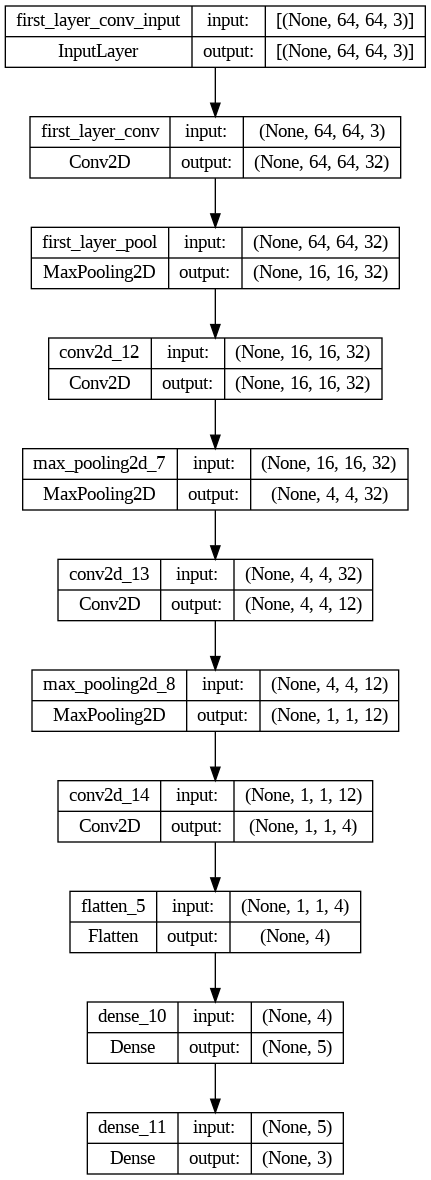

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model4, show_layer_names=True, show_shapes=True)

## Compile and Train the model

In [ ]:
# update model number
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-4a.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=15, verbose=1)


In [ ]:
history4a = model4.fit(train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 5s 145ms/step - loss: 0.9691 - accuracy: 0.5000 - val_loss: 0.7823 - val_accuracy: 0.6708
Epoch 2/200
23/23 [==============================] - 2s 101ms/step - loss: 0.6549 - accuracy: 0.7256 - val_loss: 0.7051 - val_accuracy: 0.6833
Epoch 3/200
23/23 [==============================] - 2s 103ms/step - loss: 0.5807 - accuracy: 0.7688 - val_loss: 0.5822 - val_accuracy: 0.7792
Epoch 4/200
23/23 [==============================] - 2s 102ms/step - loss: 0.4840 - accuracy: 0.8175 - val_loss: 0.5235 - val_accuracy: 0.7750
Epoch 5/200
23/23 [==============================] - 2s 107ms/step - loss: 0.3929 - accuracy: 0.8426 - val_loss: 0.4765 - val_accuracy: 0.8167
Epoch 6/200
23/23 [==============================] - 2s 106ms/step - loss: 0.3630 - accuracy: 0.8538 - val_loss: 0.4498 - val_accuracy: 0.8250
Epoch 7/200
23/23 [==============================] - 2s 105ms/step - loss: 0.2792 - accuracy: 0.8942 - val_loss: 0.3942 - val_accuracy: 0.8458

# 5. Model with new image size ("model5")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

image_size = (120, 120)
batch = 32
# Generator for training dataset
train = my_generator.flow_from_directory( "/content/bears/training", target_size=image_size, shuffle=True, batch_size=batch)

# Generator for validation dataset
val = my_generator.flow_from_directory( "/content/bears/validation", target_size=image_size, shuffle=True, batch_size=batch)


Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 32, 12, 12]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (3,3)


# convolutional base
model5 = models.Sequential()
model5.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model5.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model5.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model5.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model5.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model5.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model5.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model5.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model5.add(layers.Flatten())
#model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(8, activation='relu'))
model5.add(layers.Dense(3, activation='softmax'))

train.image_shape=(120, 120, 3)


## Inspect the model
5003

In [ ]:
model5.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 40, 40, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_117 (Conv2D)         (None, 40, 40, 32)        18464     
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_118 (Conv2D)         (None, 14, 14, 12)        3468      
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 5, 5, 12)        

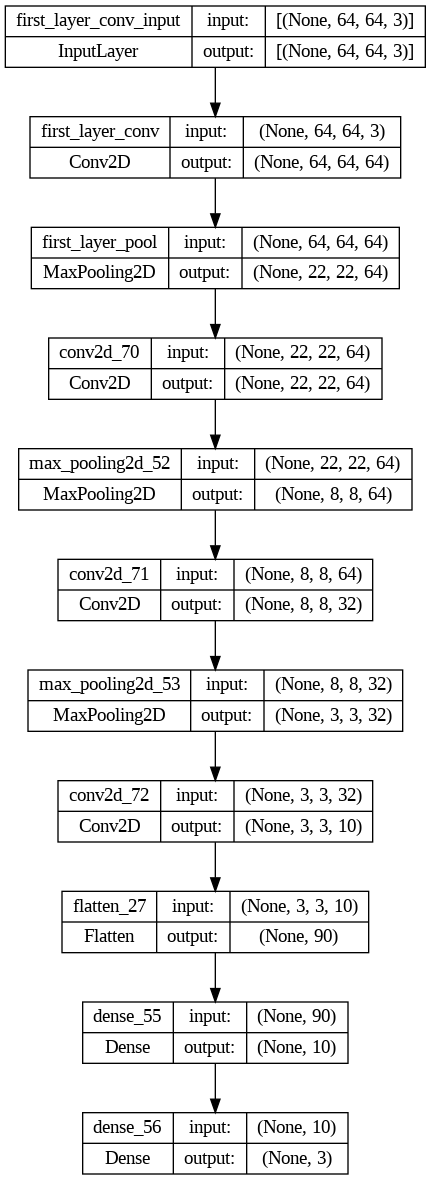

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model5, show_layer_names=True, show_shapes=True)

## Compile and Train the model

In [ ]:
# update model number
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-5.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
history5 = model5.fit(train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 6s 178ms/step - loss: 1.0818 - accuracy: 0.4095 - val_loss: 1.0419 - val_accuracy: 0.4417
Epoch 2/200
23/23 [==============================] - 3s 113ms/step - loss: 0.9947 - accuracy: 0.4903 - val_loss: 0.9201 - val_accuracy: 0.5625
Epoch 3/200
23/23 [==============================] - 3s 114ms/step - loss: 0.8277 - accuracy: 0.5780 - val_loss: 0.8650 - val_accuracy: 0.5167
Epoch 4/200
23/23 [==============================] - 3s 113ms/step - loss: 0.7117 - accuracy: 0.6811 - val_loss: 0.6590 - val_accuracy: 0.6292
Epoch 5/200
23/23 [==============================] - 3s 110ms/step - loss: 0.5944 - accuracy: 0.6379 - val_loss: 0.6644 - val_accuracy: 0.7083
Epoch 6/200
23/23 [==============================] - 3s 113ms/step - loss: 0.5391 - accuracy: 0.8412 - val_loss: 0.6039 - val_accuracy: 0.7542
Epoch 7/200
23/23 [==============================] - 3s 111ms/step - loss: 0.4032 - accuracy: 0.8510 - val_loss: 0.4308 - val_accuracy: 0.8167

# 6. Model with new image size and more filters ("model6")

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 64, 32, 32]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (3,3)


# convolutional base
model6 = models.Sequential()
model6.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model6.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model6.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model6.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model6.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model6.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model6.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model6.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model6.add(layers.Flatten())
model6.add(layers.Dense(16, activation='relu'))
model6.add(layers.Dense(8, activation='relu'))
model6.add(layers.Dense(3, activation='softmax'))

train.image_shape=(120, 120, 3)


## Inspect the model
5003

In [ ]:
model6.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 40, 40, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_123 (Conv2D)         (None, 40, 40, 64)        36928     
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 5, 5, 32)        

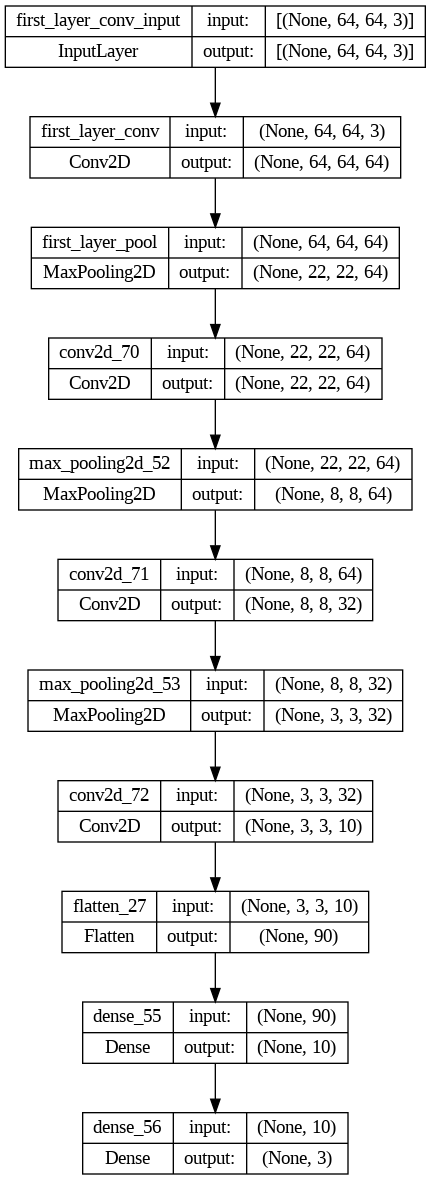

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model6, show_layer_names=True, show_shapes=True)

## Compile and Train the model

In [ ]:
# update model number
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-6.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
history6 = model6.fit(train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 6s 191ms/step - loss: 1.0271 - accuracy: 0.5014 - val_loss: 0.9040 - val_accuracy: 0.5458
Epoch 2/200
23/23 [==============================] - 3s 113ms/step - loss: 0.7575 - accuracy: 0.6574 - val_loss: 0.6306 - val_accuracy: 0.7458
Epoch 3/200
23/23 [==============================] - 3s 115ms/step - loss: 0.5979 - accuracy: 0.7618 - val_loss: 0.5534 - val_accuracy: 0.7875
Epoch 4/200
23/23 [==============================] - 3s 113ms/step - loss: 0.5512 - accuracy: 0.7897 - val_loss: 0.4951 - val_accuracy: 0.8208
Epoch 5/200
23/23 [==============================] - 3s 112ms/step - loss: 0.4237 - accuracy: 0.8454 - val_loss: 0.4613 - val_accuracy: 0.8333
Epoch 6/200
23/23 [==============================] - 2s 110ms/step - loss: 0.3458 - accuracy: 0.8733 - val_loss: 0.4341 - val_accuracy: 0.8458
Epoch 7/200
23/23 [==============================] - 3s 111ms/step - loss: 0.2958 - accuracy: 0.8942 - val_loss: 0.3862 - val_accuracy: 0.8583

# 7. Model with new image size and more filters and more pooling ("model7")

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 64, 32, 32]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4,4)


# convolutional base
model7 = models.Sequential()
model7.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model7.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model7.add(layers.Flatten())
model7.add(layers.Dense(16, activation='relu'))
model7.add(layers.Dense(8, activation='relu'))
model7.add(layers.Dense(3, activation='softmax'))

train.image_shape=(120, 120, 3)


## Inspect the model
5003

In [ ]:
model7.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_91 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 2, 2, 32)        

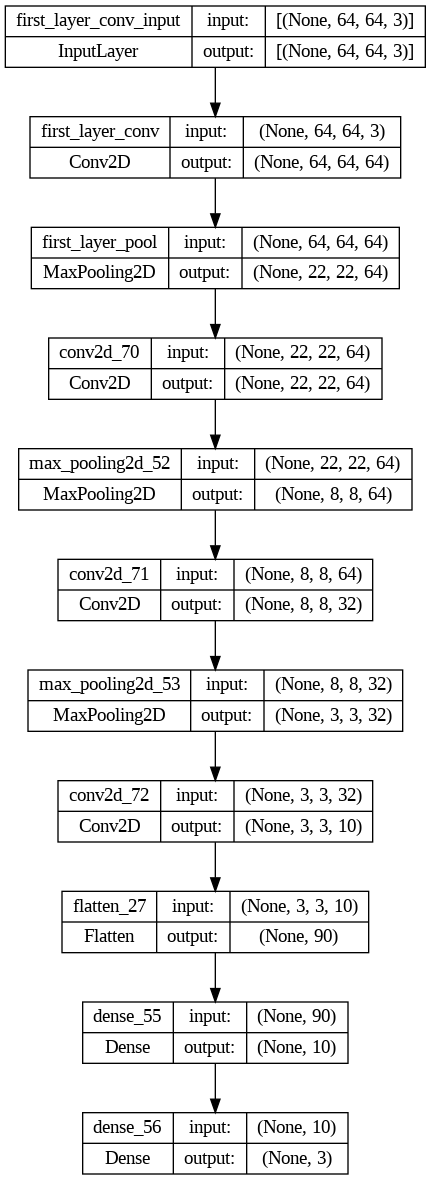

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model7, show_layer_names=True, show_shapes=True)

## Compile and Train the model

In [ ]:
# update model number
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-7.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='max', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
history7 = model7.fit(train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 6s 168ms/step - loss: 1.0831 - accuracy: 0.3691 - val_loss: 1.0206 - val_accuracy: 0.6000
Epoch 2/200
23/23 [==============================] - 2s 106ms/step - loss: 0.9400 - accuracy: 0.5599 - val_loss: 0.8586 - val_accuracy: 0.5667
Epoch 3/200
23/23 [==============================] - 2s 105ms/step - loss: 0.7265 - accuracy: 0.6657 - val_loss: 0.6514 - val_accuracy: 0.7083
Epoch 4/200
23/23 [==============================] - 2s 104ms/step - loss: 0.5852 - accuracy: 0.7549 - val_loss: 0.6704 - val_accuracy: 0.7208
Epoch 5/200
23/23 [==============================] - 2s 107ms/step - loss: 0.5279 - accuracy: 0.8036 - val_loss: 0.5283 - val_accuracy: 0.8083
Epoch 6/200
23/23 [==============================] - 2s 106ms/step - loss: 0.4055 - accuracy: 0.8426 - val_loss: 0.5219 - val_accuracy: 0.7708
Epoch 7/200
23/23 [==============================] - 2s 102ms/step - loss: 0.3233 - accuracy: 0.8816 - val_loss: 0.4176 - val_accuracy: 0.8667

# Investigate learning curves
Look back and investigate the training by comparing the accuracy on the training dataset and validation dataset

In [ ]:
import matplotlib.pyplot as plt
def plot_history(hist, title):
    fig, axs = plt.subplots(2, 1, figsize=(6, 7))

    axs[0].plot(hist.epoch, hist.history['accuracy'], label='Training Accuracy')
    axs[0].plot(hist.epoch, hist.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title("Accuracy for " + title)
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_ylim([0, 1])
    axs[0].legend()

    axs[1].plot(hist.epoch, hist.history['loss'], label='Training Loss')
    axs[1].plot(hist.epoch, hist.history['val_loss'], label='Validation Loss')

    axs[1].set_title("Loss for " + title)
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].set_ylim([0, 1])
    axs[1].legend()

    plt.tight_layout()
    plt.show()

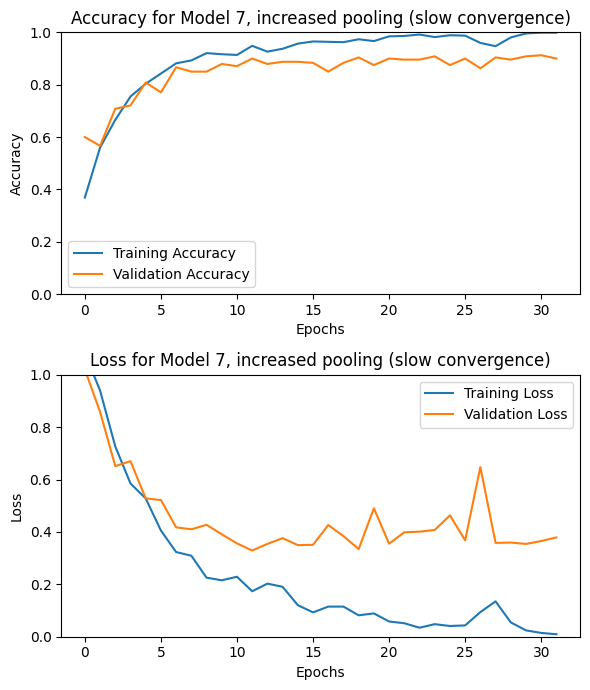

In [ ]:
plot_history(history6, "Model 7, increased pooling (slow convergence)")

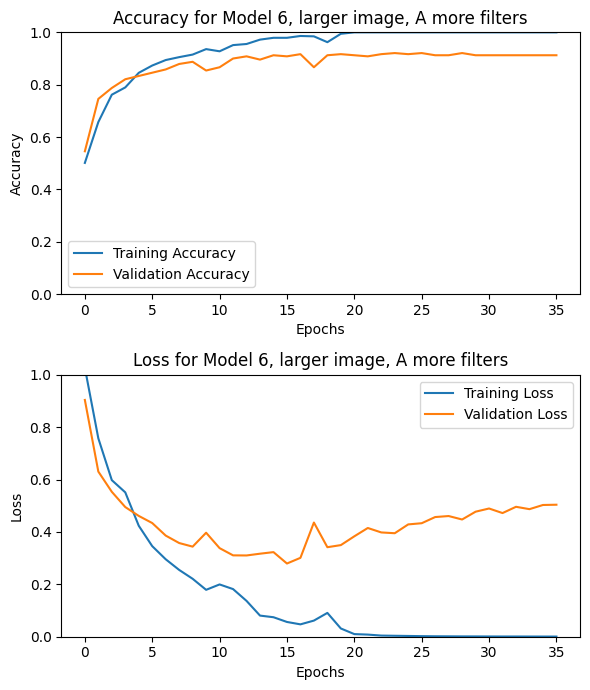

In [ ]:
plot_history(history6, "Model 6, larger image, A more filters")

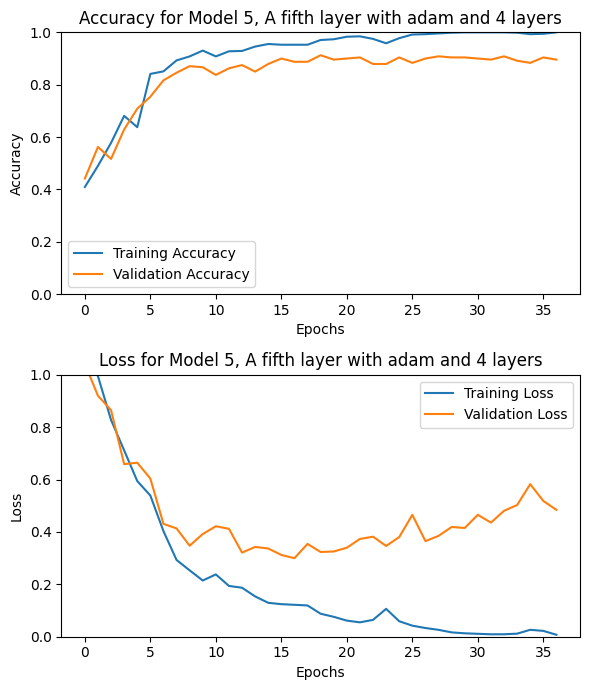

In [ ]:
plot_history(history5, "Model 5, Larger image, 3 layers")

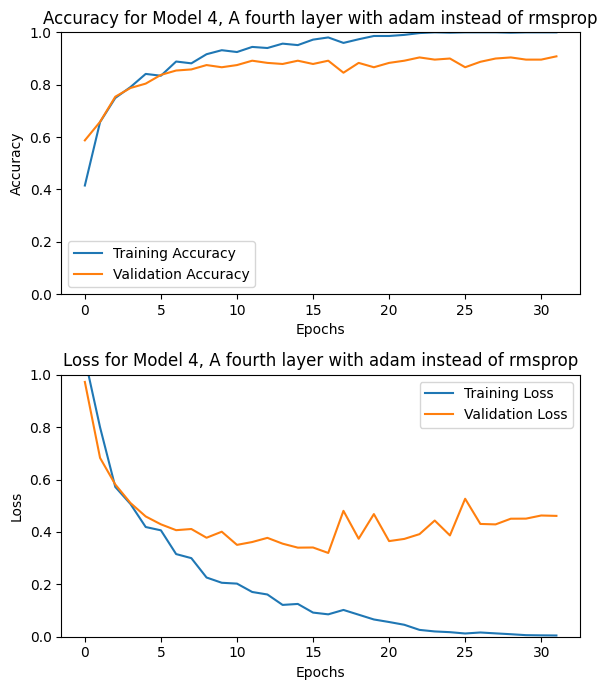

In [ ]:
plot_history(history4, "Model 4, A fourth layer with adam instead of rmsprop")

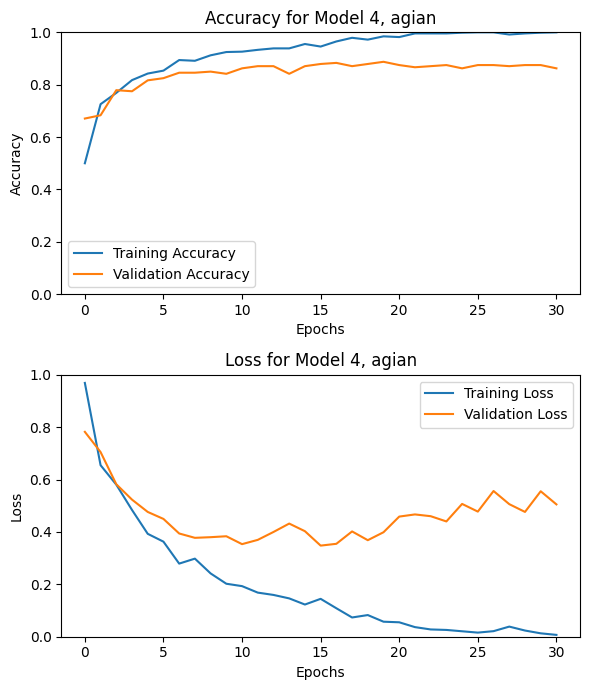

In [ ]:
plot_history(history4a, "Model 4, agian")

In [ ]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 64, 64, 64)        1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 12)          3468      
                                                                 
 flatten_7 (Flatten)         (None, 192)              

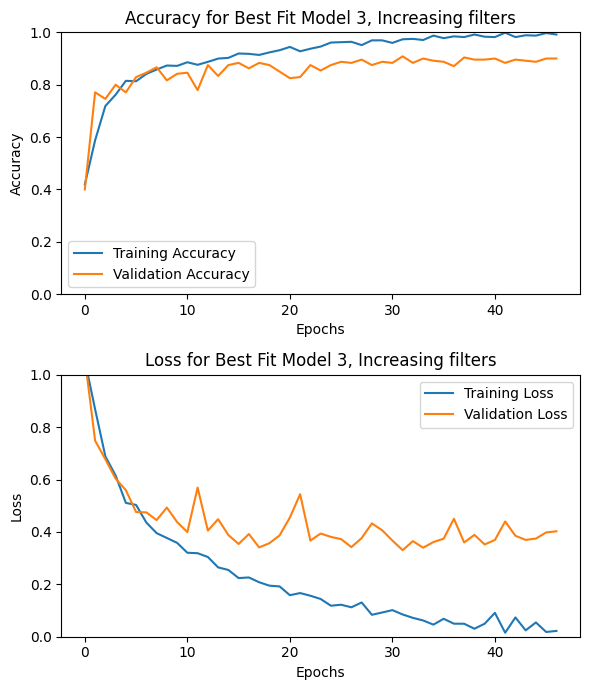

In [ ]:
plot_history(history3, "Best Fit Model 3, Increasing filters")

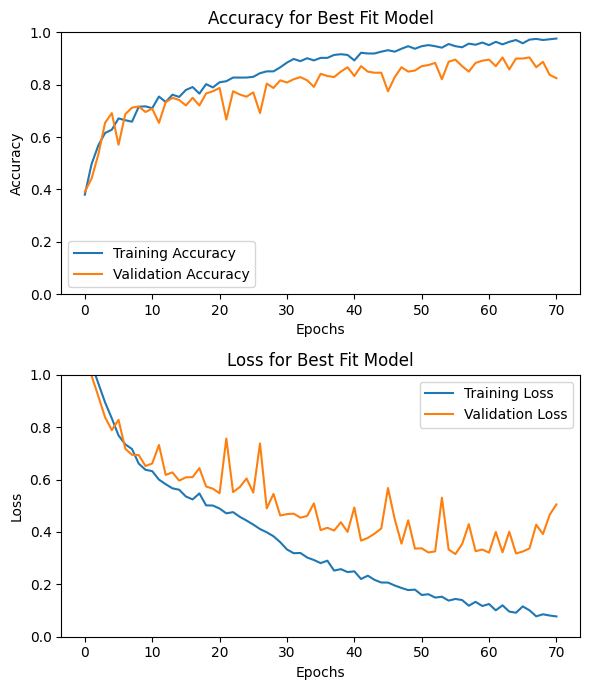

In [ ]:
plot_history(history2, "Best Fit Model 2")

## Peek into what the model is predicting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def peek_predictions(model, dataset, num_images=5):
    images, labels = dataset[0]
    classes = list(dataset.class_indices.keys())
    for i in range(len(images)):
        idx = np.argmax(labels[i]) # get label index
        x = images[i]
        plt.figure()
        plt.imshow(x)

        x = np.expand_dims(x, axis=0)
        p = model.predict(x, verbose=0)

        plt.title(f'Prediction: {p.argmax()} {classes[p.argmax()]}') # add name of label train_ds.class_indices
        plt.show()
        print(f"Ground truth: {classes[idx]} {idx} {str(labels[i])}") # add name of label
        print(f'Prediction:\t{classes[p.argmax()]} {p.argmax()} {p}')
        if i == num_images: break

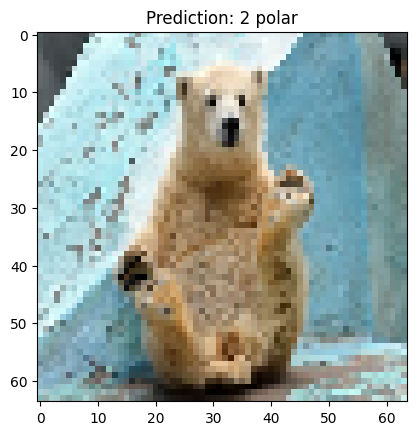

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[2.2681723e-03 9.7285058e-10 9.9773186e-01]]


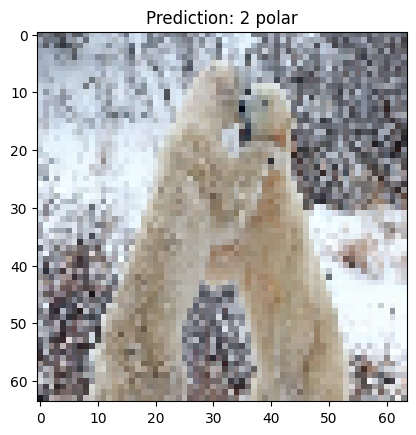

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[4.3381123e-12 9.5713420e-12 1.0000000e+00]]


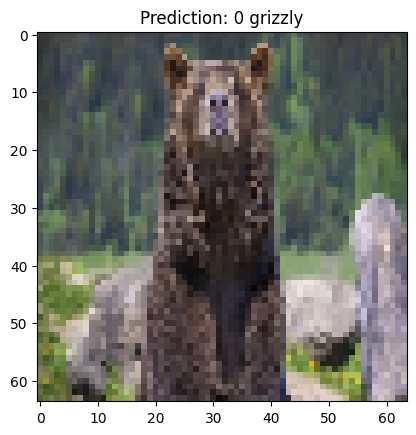

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9999928e-01 1.7176914e-10 7.6174433e-07]]


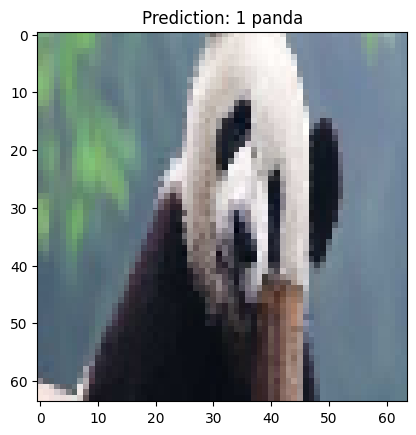

Ground truth: panda 1 [0. 1. 0.]
Prediction:	panda 1 [[3.3910489e-01 6.6088265e-01 1.2413176e-05]]


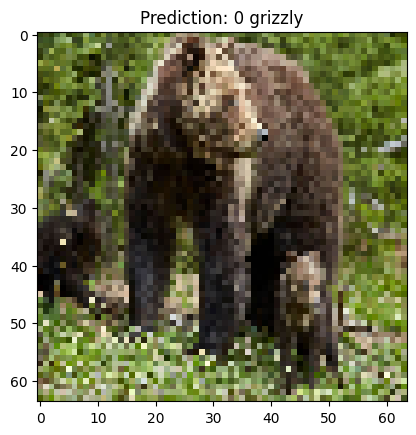

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9893981e-01 2.0156064e-07 1.0599240e-03]]


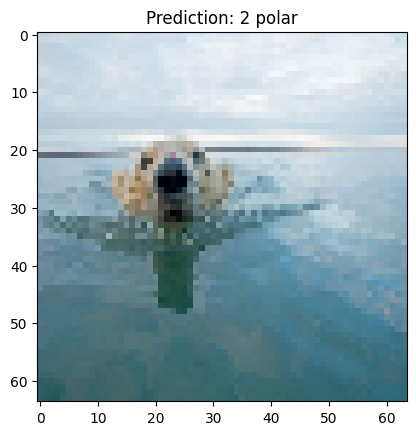

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[2.982370e-11 6.270174e-11 1.000000e+00]]


In [ ]:
peek_predictions(model2, val)